# Regresní analýza

Doporučené video

https://www.youtube.com/watch?v=0m-rs2M7K-Y

Regresní analýza je nástroj, který umožňuje na základě dostupných dat dovodit či predikovat hodnoty proměnné na základě hodnoty jiné proměnné, případně hodnot více proměnných.

Příkladem nechť je snaha získat informaci o vlivu různých proměnných na příjem (plat). Do těchto vlivů zařadíme:

- Nejvyšší dosažené vzdělání

- Délka pracovní doby

- Věk pracujícího

Jednotlivé vlivy představují proměnné a lze, s vhodnými daty, zkoumat jejich vliv na proměnnou (veličinu) definující příjem (plat). Pokud míra vlivu bude stanovena (odvozena z dat), lze předpovědět plat pro konkrétní osobu u níž známe vzdělání, délku pracovní doby a věk.

Proměnná, jejiž hodnodu zkoušíme predikovat je závislá proměnná. Ostatní proměnné jsou nezávislé proměnné.

Regresní analýza je typicky využívána dvěma základními způsoby. 

- Identifikace vlivů na sledovanou proměnnou. Např. jaký vliv má vzdělání rodičů na školní výsledky dětí, jaký vliv má oblast, kde děti žijí na jejich výsledky. V tomto případě nás nezajímá predikce školních výsledků. Cílem je eliminovat negativní vlivy.

- Predikce s cílem plánování. Např. jaký vliv má věk na případnou délku hospitalizace nemocného.

Typy regresní analýzy

- Jednoparametrická linerání regrese

- Víceparametrická lineární regrese

- Logistická regrese (logistická funkce)

Logistická regrese se uplatňuje velmi často v situacích, odpovědi tvoří kategorie , např binárními odpověďmi Ano/Ne, 

## Lineární regrese (Jednoparametrická , víceparametrická)

Jednoparametrická lineární regrese je charakteristická existencí jedné nezávislé a jedné závislé proměnné. 

V limitním případě dvojice hodnot závislé a nezávislé proměnné leží na společné přímce.

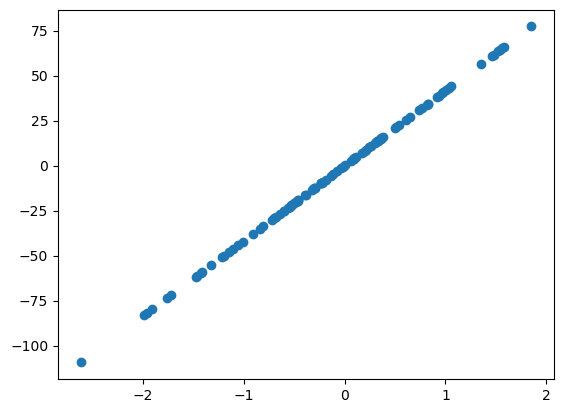

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=0, random_state=42)

plt.scatter(X, y)

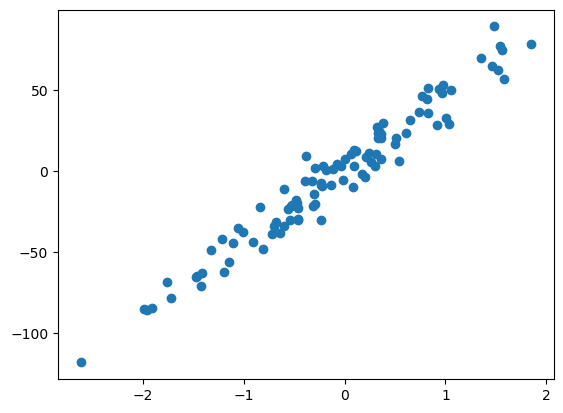

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

plt.scatter(X, y)

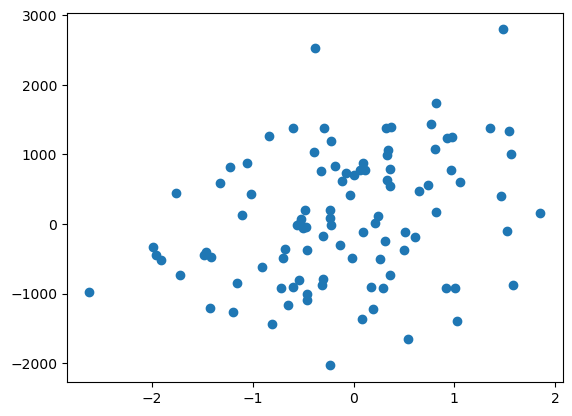

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=1000, random_state=42)

plt.scatter(X, y)

Pro určení parametrů regrese se používá metoda nejmenších čtverců.

$\hat{y}=\beta_0+\beta_1 x_1 + \epsilon$

- $y$ závislá proměnná

- $x$ nezávislá proměnná

- $\beta_1$ koeficient, definuje vztah mezi závislou a nezávislou proměnnou

- $\epsilon$ chyba, průměrná chyba je 0

## Příklad

### Data

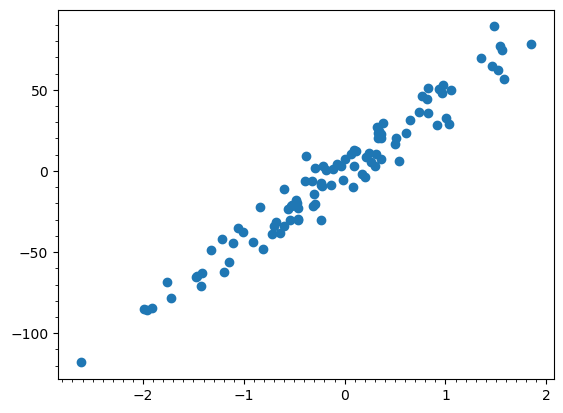

In [8]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

import numpy as np

yticks = np.arange(-150, 150, 10)
xticks = np.arange(-3, 3, 0.1)
plt.yticks(yticks, minor=True)
plt.xticks(xticks, minor=True)
plt.scatter(X, y)

#tick_params(axis="x", labelbottom=False)

### Human prediction

Udělejte si vlastní predikci, zjistěte hodnoty

### Lineární

$\min_{w} || X w - y||_2^2$

In [9]:
from sklearn import linear_model
regL = linear_model.LinearRegression()

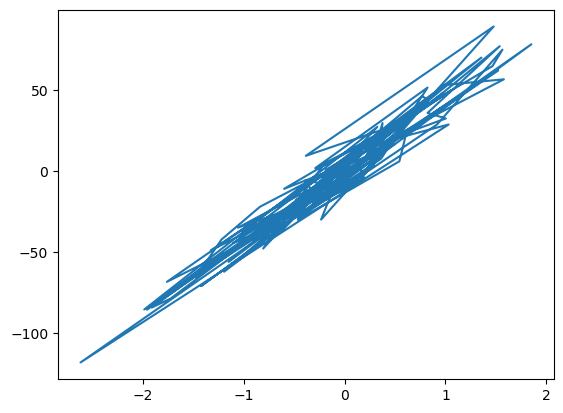

In [10]:
plt.plot(X, y)

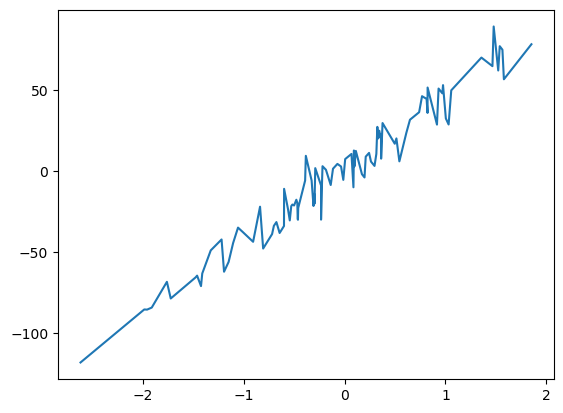

In [11]:
xy = list(zip(X, y))
xy.sort(key=lambda item: item[0])
xs = list(map(lambda item: item[0], xy))
ys = list(map(lambda item: item[1], xy))
plt.plot(xs, ys)

In [12]:
#reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
regL.fit(X, y)
print(regL.coef_, regL.intercept_)

[44.43716999] 1.1651153205269726


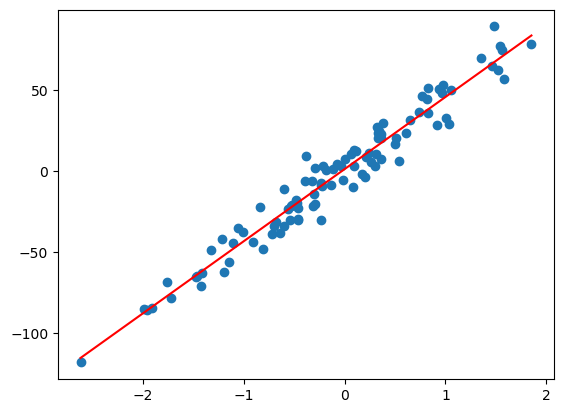

In [13]:

X_test = [max(X), min(X)]
y_predL = regL.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_predL, "r")

In [14]:
def LinearPredictor(A, b):
    def predict(X):
        result = []
        for x in X:
            particular = [ai * xi + b for ai, xi in zip(A, x)]
            result.append(sum(particular))
        return result
    return predict

In [15]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y,y))

y_pred = regL.predict(X)
print('MSE:',metrics.mean_squared_error(y,y_pred))

predictor=LinearPredictor(regL.coef_, regL.intercept_)
y_pred2=predictor(X)
print('MSE:',metrics.mean_squared_error(y,y_pred2))

MSE: 0.0
MSE: 78.054250421239
MSE: 78.054250421239


## Human predict evaluation

Vyhodnoťte vlastní predikci

In [16]:
A=[44.43716999] 
b=1.1651153205269726
predictor=LinearPredictor(A, b)
y_pred2=predictor(X)
print('MSE:',metrics.mean_squared_error(y,y_pred2))

MSE: 78.054250421239


In [19]:
A=[44]
b=1.2
predictor=LinearPredictor(A, b)
y_pred2=predictor(X)
print('MSE:',metrics.mean_squared_error(y,y_pred2))

MSE: 78.21674758711843


### Ridge

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

In [17]:
regR = linear_model.Ridge(alpha=1)
regR.fit(X, y)
regR.coef_

array([43.89952962])

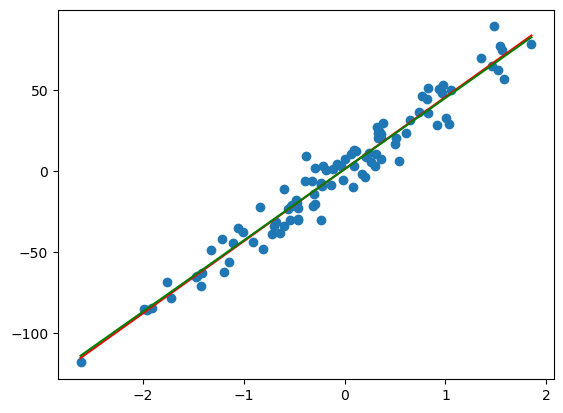

In [18]:
y_predR = regR.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_predL, "r")
plt.plot(X_test, y_predR, "g")

### Lasso

$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

In [20]:
regLasso = linear_model.Lasso(alpha=0.1)
regLasso.fit(X, y)

Lasso(alpha=0.1)

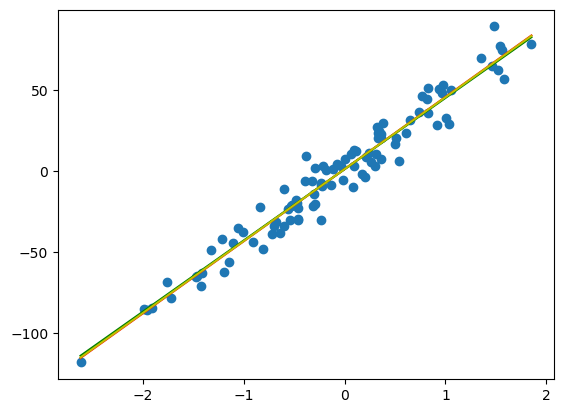

In [21]:
y_predLasso = regLasso.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_predL, "r")
plt.plot(X_test, y_predR, "g")
plt.plot(X_test, y_predLasso, "y")

In [41]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
X, y = make_regression(n_samples=100, n_features=2, noise=0, random_state=42)

In [42]:
X[0]

array([-1.60748323,  0.18463386])

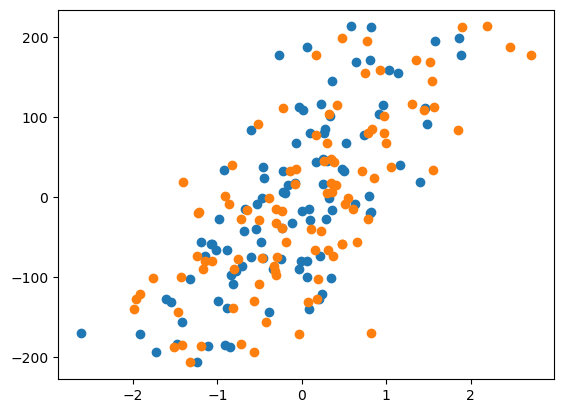

In [43]:
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 1], y)

In [44]:
xy = list(zip(X, y))
xy[0]

(array([-1.60748323,  0.18463386]), -127.35915354040701)

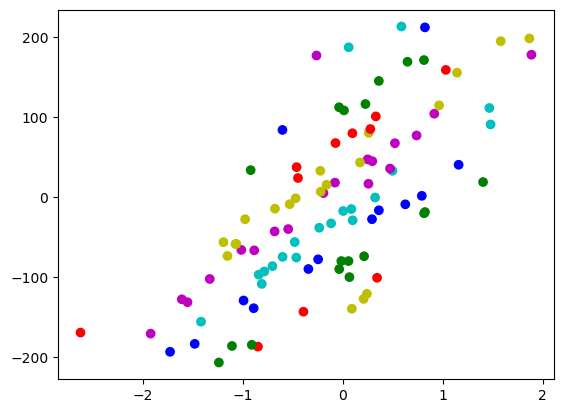

In [65]:
from itertools import cycle
import numpy as np

colors = ['r', 'g', 'b', 'c', 'm', 'y']
step = 0.45
xy = list(zip(X, y))
for i, c in zip(np.arange(-10, 11, step), cycle(colors)):
    xyfilter = list(filter(lambda  item: (item[0][1] < i + step) and (item[0][1] >= i), xy))
    xs = list(map(lambda item: item[0][0], xyfilter))
    ys = list(map(lambda item: item[1], xyfilter))
    if len(xs) == 0:
        continue
    #print(xs, ys, [c] * len(xs))
    plt.scatter(xs, ys, c=[c] * len(xs))
    

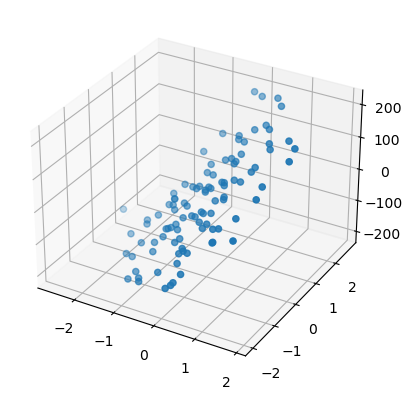

In [46]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

## Nemovitosti

Based on https://www.kaggle.com/code/scratchpad/notebook4d6bd10389

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [29]:
datafilename = '/kaggle/input/boston-house-prices/housing.csv'
datafilename = 'housing.csv'
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(datafilename, header=None, delimiter=r"\s+", names=column_names)

data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
data.shape

(506, 14)

In [31]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [33]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [34]:
# Check for missing values
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [35]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [36]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


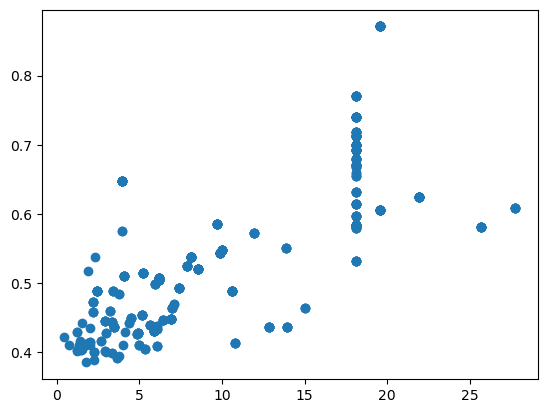

In [37]:
plt.scatter(data['INDUS'], data['NOX'])

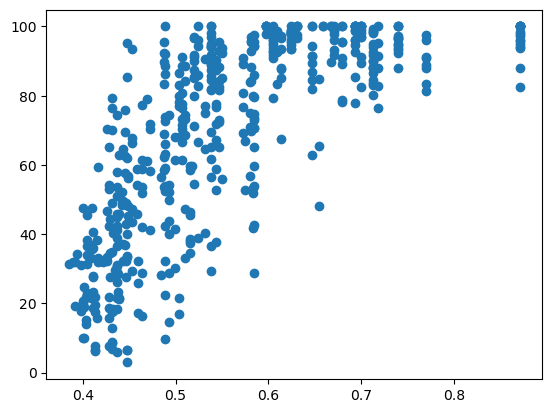

In [38]:
plt.scatter(data['NOX'], data['AGE'])

In [39]:
# Finding out the correlation between the features
corr=data.corr()
#corr
corr.shape

(14, 14)

<AxesSubplot: >

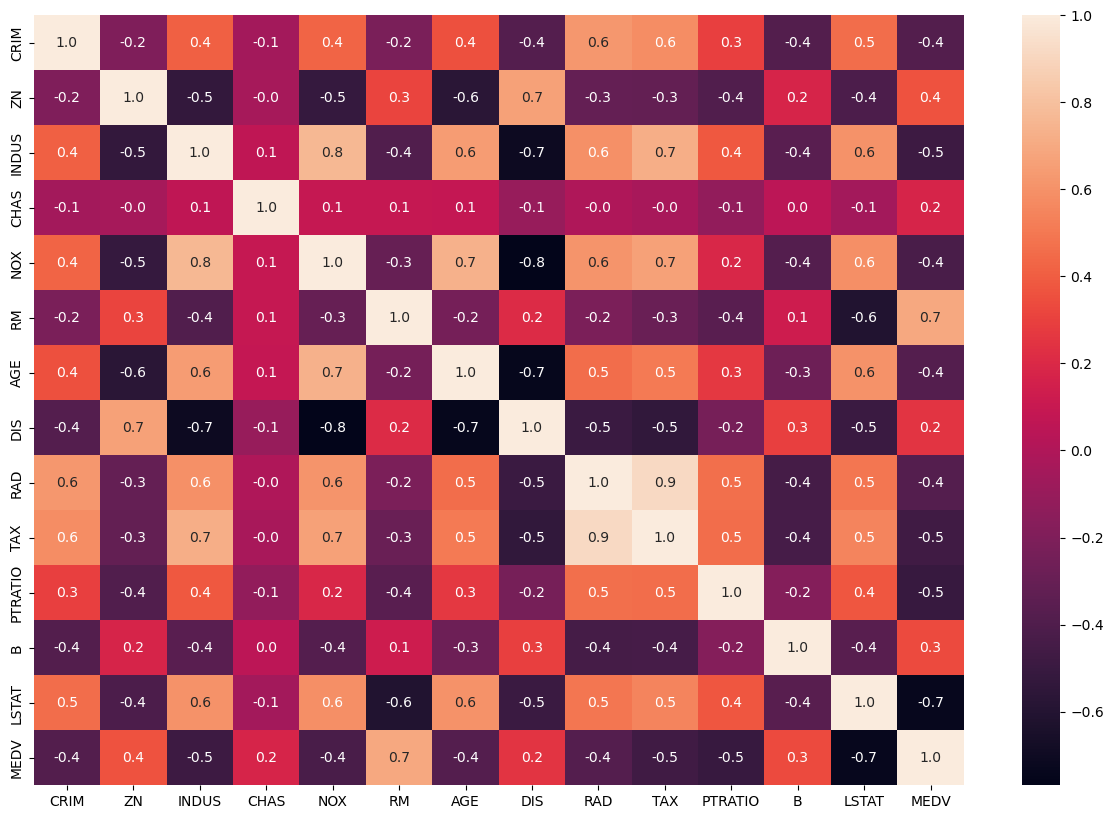

In [40]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.1f')

In [51]:
# Spliting target variable and independent variables
#X= independent variables  or explanatory variable or causes variable
#y= target variable or final goal
X= data.drop('MEDV',axis=1)
y=data['MEDV']

In [41]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lr=LinearRegression()
# Train the model using the training sets
lr.fit(X_train,y_train)

LinearRegression()

- if y^ is the predicted value.
- y^(w, x) = w0 + w1x1+. . . +wpxp
- Across the module, we designate the vector w = (w1, . . . , wp)  as coef_ and w0 as intercept_ .

In [54]:
# Value of y intercept
lr.intercept_

31.631084035692854

In [43]:
# Model prediction on train data
y_pred=lr.predict(X_train)

In [56]:
#model Evaluation
from sklearn import metrics
print('R^2:', metrics.r2_score(y_train,y_pred))
print('Adjusted R^2 :', 1-((1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)) )
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
#print('MSE:',type(metrics.mean_squared_error(y_train,y_pred)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
train_predicted_score = [0.7465991966746854,0.736910342429894,3.08986109497113,19.07368870346903,4.367343437774162]

R^2: 0.7434997532004697
Adjusted R^2 : 0.7336923908228405
MAE: 3.356826782168207
MSE: 22.545481487421426
RMSE: 4.748208239685937


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

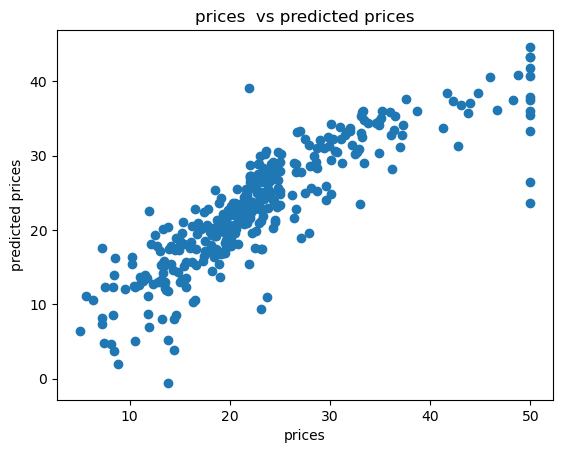

In [57]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices  vs predicted prices')
plt.show()

Text(0.5, 1.0, 'Predicted vs Residuals')

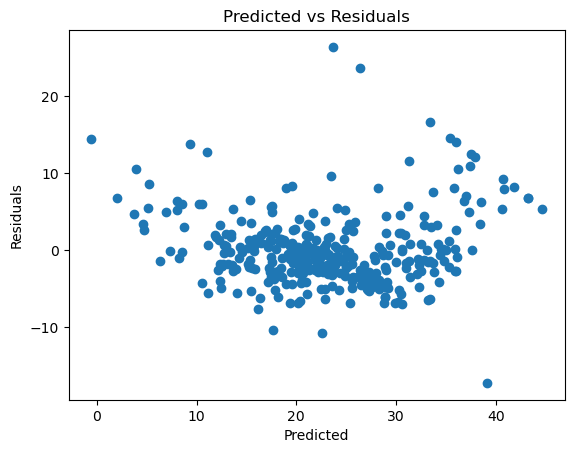

In [58]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

/tmp/ipykernel_23855/504747918.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_train)


Text(0, 0.5, 'Frequency')

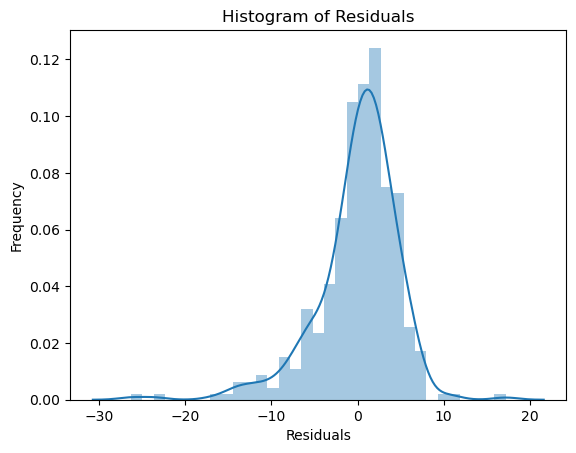

In [59]:
# Checking Normality of errors
sns.distplot(y_pred-y_train)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

Here the residuals are normally distributed. So normality assumption is satisfied


In [60]:
# Predicting Test data with the model
y_test_pred=lr.predict(X_test)

In [61]:
#model Evaluation
from sklearn import metrics
print('R^2:', metrics.r2_score(y_test,y_test_pred))
print('Adjusted R^2 :', 1-((1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)) )
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
#print('MSE:',type(metrics.mean_squared_error(y_test,y_test_pred)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
test_predicted_score=[0.7121818377409181,0.6850685326005699,3.8590055923707487,30.053993307124273,5.4821522513629874]

R^2: 0.711226005748491
Adjusted R^2 : 0.6840226584639286
MAE: 3.1627098714574218
MSE: 21.51744423117737
RMSE: 4.638689926172838


In [62]:
#comparing model evaluation values on train and test data.
score_compare=pd.DataFrame({'train_predicted_score':train_predicted_score ,'test_predicted_score':test_predicted_score })
score_compare.index=['R^2','Adjusted R^2','MAE','MSE','RMSE']
score_compare

,train_predicted_score,test_predicted_score
R^2,0.746599,0.712182
Adjusted R^2,0.736910,0.685069
MAE,3.089861,3.859006
MSE,19.073689,30.053993
RMSE,4.367343,5.482152


In [ ]:
https://365datascience.com/tutorials/python-tutorials/linear-regression/

In [ ]:
https://youtu.be/m88h75F3Rl8

In [ ]:
https://www.youtube.com/watch?v=0m-rs2M7K-Y

In [1]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm

In [2]:
# https://365datascience.com/resources/downloadables/1.01.%20Simple%20linear%20regression.csv
datafilename = "1.01. Simple linear regression.csv"
data = pd.read_csv(datafilename)

In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


SAT - SAT score

GPA - Grade points average (průměrná známka)


In [4]:
y = data['GPA']
x1 = data['SAT']

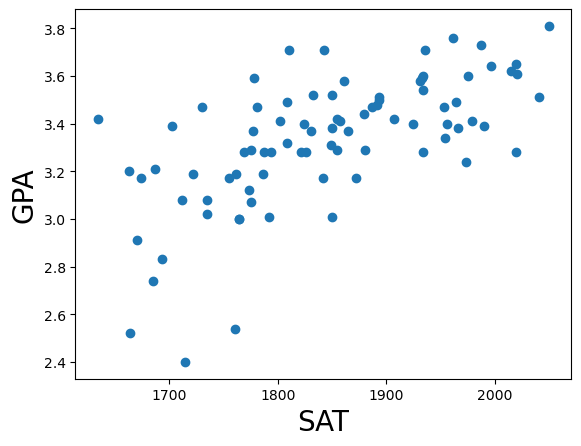

In [5]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [6]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           7.20e-11
Time:                        10:57:13   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html




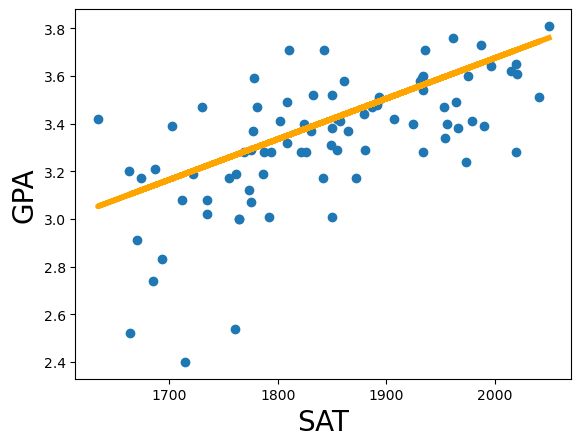

In [7]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275 # předchozí výstup, popis, řádky const+SAT ve sloupci
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

$||y - Xw||^2_2 + alpha * ||w||^2_2$